<a href="https://colab.research.google.com/github/Mandar-Desurkar/Credit_Card_Fraud_Detection_using_ML/blob/main/Credit_Card_Fraud_Detection_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
df=pd.read_csv('creditcard.csv')
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15931,27369,-1.160116,-0.244177,0.744250,-0.192350,1.156356,-1.931383,0.409670,-0.364716,-0.516156,...,-0.021714,0.012447,-0.360625,0.514926,0.064194,1.026317,-0.030845,-0.083609,52.90,0.0
15932,27369,-3.058318,3.099206,-4.932555,1.924138,-1.576032,-2.135383,-0.830098,2.228617,-0.312343,...,-0.111526,-0.485223,-0.003945,0.049422,-0.173962,-0.379260,0.171872,-0.236166,99.99,0.0
15933,27369,-0.661806,0.315385,2.011194,-0.438757,-0.554990,-0.668072,0.424651,0.079141,0.126057,...,0.148063,0.177511,0.134794,0.359931,-0.544428,0.181545,0.068546,0.153438,74.58,0.0
15934,27370,1.525348,-1.231442,0.420095,-1.551218,-1.376006,0.100758,-1.455755,0.134876,-1.319056,...,-0.108619,0.084883,-0.051758,-0.815038,0.331989,-0.015837,0.058942,0.011087,6.00,0.0
15935,27371,1.385680,-0.590076,-0.569197,-0.939441,-0.196015,-0.486685,-0.102496,-0.237930,-0.928028,...,-0.255944,-1.055682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df.dropna(inplace=True)
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15930,27368,-0.711494,0.785312,1.918214,-0.319681,0.113449,-1.279736,0.728519,-0.114506,-0.511745,...,-0.138591,-0.555546,-0.005721,0.687330,-0.210935,-0.067870,0.032099,0.111371,1.29,0.0
15931,27369,-1.160116,-0.244177,0.744250,-0.192350,1.156356,-1.931383,0.409670,-0.364716,-0.516156,...,-0.021714,0.012447,-0.360625,0.514926,0.064194,1.026317,-0.030845,-0.083609,52.90,0.0
15932,27369,-3.058318,3.099206,-4.932555,1.924138,-1.576032,-2.135383,-0.830098,2.228617,-0.312343,...,-0.111526,-0.485223,-0.003945,0.049422,-0.173962,-0.379260,0.171872,-0.236166,99.99,0.0
15933,27369,-0.661806,0.315385,2.011194,-0.438757,-0.554990,-0.668072,0.424651,0.079141,0.126057,...,0.148063,0.177511,0.134794,0.359931,-0.544428,0.181545,0.068546,0.153438,74.58,0.0
15934,27370,1.525348,-1.231442,0.420095,-1.551218,-1.376006,0.100758,-1.455755,0.134876,-1.319056,...,-0.108619,0.084883,-0.051758,-0.815038,0.331989,-0.015837,0.058942,0.011087,6.00,0.0


In [90]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [72]:
fraud= df.loc[df['Class']==1]
normal= df.loc[df['Class']==0]

In [73]:
len(fraud)

73

In [74]:
len(normal)

15860

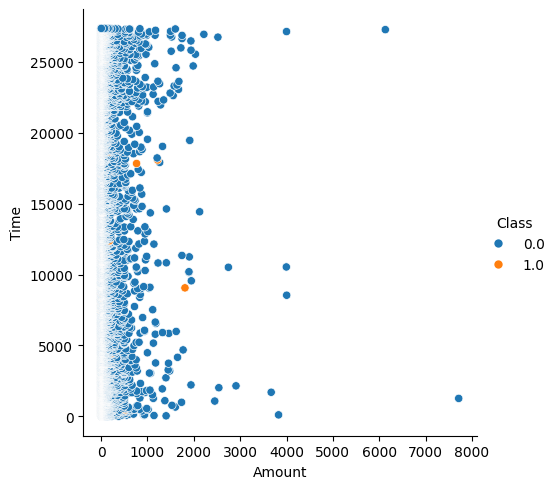

In [75]:
sns.relplot(x='Amount', y='Time', data=df, hue='Class')

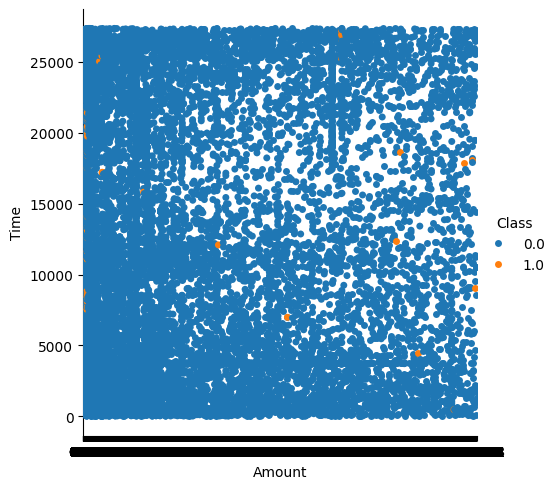

In [88]:
sns.catplot(x='Amount', y='Time', data=df, hue='Class')

In [76]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [77]:
x= df.iloc[:,:-1]
y= df['Class']

In [78]:

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=0)

In [79]:
clf= linear_model.LogisticRegression( C=1e5)

In [80]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0)

In [81]:

y=np.array(y_test)

In [82]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [83]:
print(classification_report(y, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4756
         1.0       0.84      0.67      0.74        24

    accuracy                           1.00      4780
   macro avg       0.92      0.83      0.87      4780
weighted avg       1.00      1.00      1.00      4780



In [84]:
print(confusion_matrix(y, clf.predict(X_test)))

[[4753    3]
 [   8   16]]


In [85]:
print(accuracy_score(y, clf.predict(X_test)))

0.9976987447698745


In [86]:
print(clf.predict(X_test))

[0. 0. 0. ... 0. 0. 0.]
